# Unit Conversions

Pylanetary implements various solar-system-specific unit conversions.

In [1]:
# imports
from pylanetary.utils import *
import numpy as np
import matplotlib.pyplot as plt

## conversions for radio data

In [2]:
Tb = 100 #K
freq = 115.271 #GHz
beamx = 0.4 #arcsec
beamy = beamx

jybm = tb_to_jybm(Tb, freq, beamx, beamy)
print(f'Result is {jybm:.2e} Jy/beam')

jysr = jybm_to_jysr(jybm, beamx, beamy)
print(f'which translates to {jysr:.2e} Jy/sr.')

jysr_rj = rayleigh_jeans(Tb, freq)
print(f'The above is using the Rayleigh-Jeans approximation, and could have been done in one step: {jysr_rj:.2e} Jy/sr')

jysr = planck(Tb, freq)
print(f'Using the full Planck function we get: {jysr:.2e} Jy/sr')

beamA = beam_area(beamx, beamy)
print(f'The angular area of the beam is {beamA:.2f} arcsec^2 assuming Gaussian shape')



Result is 1.74e-01 Jy/beam
which translates to 4.09e+10 Jy/sr.
The above is using the Rayleigh-Jeans approximation, and could have been done in one step: 4.08e+10 Jy/sr
Using the full Planck function we get: 3.97e+10 Jy/sr
The angular area of the beam is 0.18 arcsec^2 assuming Gaussian shape


## I/F calculation

definition from Hammel et al 1989, DOI:10.1016/0019-1035(89)90149-8

Let's calculate the I/F of Proteus in H-band from a measurement in erg s-1 cm-2 um-1.



Proteus solid angle is 6.55e-15 sr = 0.000278 arcsec^2


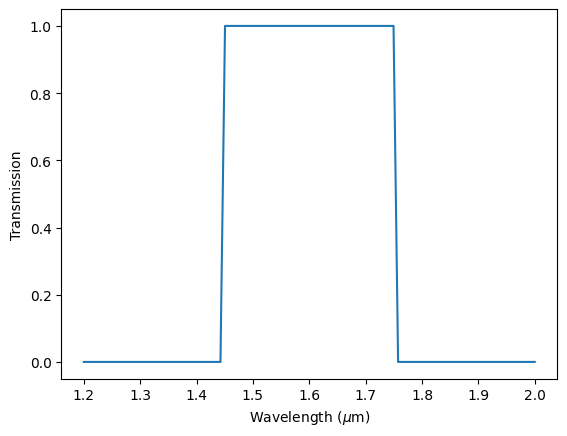

Proteus I/F at 1.60 um = 0.11


In [3]:
observed_flux = 7e-14 #erg s-1 cm-2 um-1
neptune_earth_dist = 4.6e9 #km
neptune_sun_dist = 4.3e9 #km

r = 210 #km; radius of Proteus
dS = np.pi*r**2

# find the solid angle of Proteus
Omega = solid_angle(dS, neptune_earth_dist)
print(f'Proteus solid angle is {Omega:.2e} sr = {Omega*4.25e10:.6f} arcsec^2')

# example transmission curve for roughly H-band
wls = np.linspace(1.2, 2.0, 100) #microns
trans = np.zeros(wls.shape)
trans[wls < 1.75] = 1.0
trans[wls < 1.45] = 0.0
bp = np.array([wls, trans])

plt.plot(wls, trans)
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Transmission')
plt.show()

# find I/F in that filter
wl_eff, IoverF = I_over_F(observed_flux, bp, neptune_sun_dist/1.5e8, Omega)
print(f'Proteus I/F at {wl_eff:.2f} um = {IoverF:.2f}')